# Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

import warnings
warnings.filterwarnings("ignore")


# 1. Today's Home work
* Explore column
* Check what each column represents (Name, Club, Position, Goals, Assists, Shots, etc.).
* Identify which columns are useful for predicting player performance (Goals, Assists, Appearances, Shots, Accuracy).
* Make a short note of irrelevant columns (like Jersey Number, Nationality if not needed).
* Handle Missing Values
* Find empty or “0” values in important columns and replace with mean.


In [ ]:
file_path = "/content/drive/MyDrive/ScoreSight_Dataset.csv"
df = pd.read_csv(file_path)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,570.000000,571.000000,571.000000,571.000000,571.000000,309.000000,502.000000,502.000000,502.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,571.000000,571.000000,571.000000,502.000000
mean,19.534636,25.789474,68.823117,28.957968,23.896673,7.327496,2.648414,1.414343,4.468127,2.388446,...,24.652174,45.869565,20.782609,25.565217,210.000000,414.144928,7.917688,0.301226,53.033275,11.063745
std,14.273515,4.377354,81.797516,38.969376,28.488376,16.810490,8.002117,3.433374,11.048341,6.295652,...,46.282644,82.332167,43.058397,47.333758,334.822473,641.246265,11.556811,0.698607,75.605560,26.570058
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.000000,1.000000,1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,36.000000,12.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,22.000000,2.000000
75%,27.000000,29.000000,108.000000,41.000000,36.000000,6.000000,0.390000,1.000000,3.000000,2.000000,...,31.000000,45.000000,17.000000,28.000000,300.000000,527.000000,11.000000,0.000000,74.000000,8.750000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


### Observations noted from Homework 1:

1. Columns with Missing Values (NaN): Heavy missing values need careful handling. Below columns have missing values which need to be replaced by NaN, not by 0.

Player & Performance Related:
* Jersey Number (563 / 571)
* Nationality (570 / 571)
* Age (570 / 571)
* Goals per match (309 / 571)
* Shots (309 / 571)
* Shots on target (309 / 571)
* Big chances missed (309 / 571)
* Penalties scored (309 / 571)
* Freekicks scored (309 / 571)

Defensive Metrics:
* Tackles (502 / 571)
* Blocked shots (502 / 571)
* Interceptions (502 / 571)
* Clearances (502 / 571)
* Headed Clearance (502 / 571)
* Recoveries (390 / 571)
* Duels won (390 / 571)
* Duels lost (390 / 571)
* Successful 50/50s (390 / 571)
* Aerial battles won (390 / 571)
* Aerial battles lost (390 / 571)

Goalkeeper-Specific Metrics:

   * Clean sheets (262 / 571)
   * Goals conceded (262 / 571)
   * Saves (69 / 571)
   * Penalties saved (69 / 571)
   * Punches (69 / 571)
   * High Claims (69 / 571)
   * Catches (69 / 571)
   * Sweeper clearances (69 / 571)
   * Throw outs (69 / 571)
   * Goal Kicks (69 / 571)

2. Below columns are objects but actually numeric percentages, so we need to convert to numeric before modeling.
* Shooting accuracy %
* Tackle success %
* Cross accuracy %

3. Columns with Complete Data (No Missing Values)

  The below columns are fully populated and safe to use directly:
* Name
* Club
* Position
* Appearances
* Wins
* Losses
* Goals
* Assists
* Passes
* Passes per match
* Yellow cards
* Red cards
* Fouls

# 2. Home work
* Save the sorted cleaned dataset
* Encode categorical values
* Club: Arsenal, Position: Forward, Home/Away: Home

In [ ]:
df_sorted = df.sort_values(by='Goals', ascending=False)

df_sorted.to_csv("sorted_cleaned_epl_player_data.csv", index=False)

from sklearn.preprocessing import LabelEncoder

position_encoder = LabelEncoder()
df_sorted['Position_encoded'] = position_encoder.fit_transform(df_sorted['Position'])

df_sorted = pd.get_dummies(df_sorted, columns=['Club'], prefix='Club', drop_first=False)

if 'Home/Away' in df_sorted.columns:
    df_sorted['Home_Away_encoded'] = df_sorted['Home/Away'].map({'Home': 1, 'Away': 0})
else:
    df_sorted['Home_Away_encoded'] = 1

df_sorted.head()


,Name,Jersey Number,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Club_Manchester-City,Club_Manchester-United,Club_Newcastle-United,Club_Sheffield-United,Club_Southampton,Club_Tottenham-Hotspur,Club_West-Bromwich-Albion,Club_West-Ham-United,Club_Wolverhampton-Wanderers,Home_Away_encoded
344,Sergio Agüero,10.0,Forward,Argentina,32.0,263,177,44,180,0.68,...,True,False,False,False,False,False,False,False,False,1
489,Harry Kane,10.0,Forward,England,27.0,212,120,48,144,0.68,...,False,False,False,False,False,True,False,False,False,1
281,Jamie Vardy,9.0,Forward,England,33.0,213,86,77,105,0.49,...,False,False,False,False,False,False,False,False,False,1
342,Raheem Sterling,7.0,Forward,England,25.0,260,161,55,86,0.33,...,True,False,False,False,False,False,False,False,False,1
313,Sadio Mané,10.0,Forward,Senegal,28.0,196,121,35,86,0.44,...,False,False,False,False,False,False,False,False,False,1


# 3. Home work 1
Exploratory data analysis
Graph Type        | X-axis Column   | Y-axis Column
----------------- |-----------------  |----------------------
Histogram         | Goals                 | Frequency
Scatter               | Appearances     | Goals
Scatter               | Age                   | Goals
Bar Chart           | Club                  | Goals (sum)
Bar Chart           | Position             | Goals (avg)
Scatter               | Shots                 | Goals
Scatter               | Assists               | Goals
Scatter               | Passes               | Assists
Scatter               | Tackles              | Tackle success %
Bar Chart           | Nationality         | Goals (sum)

plot the graphs using matplot lib

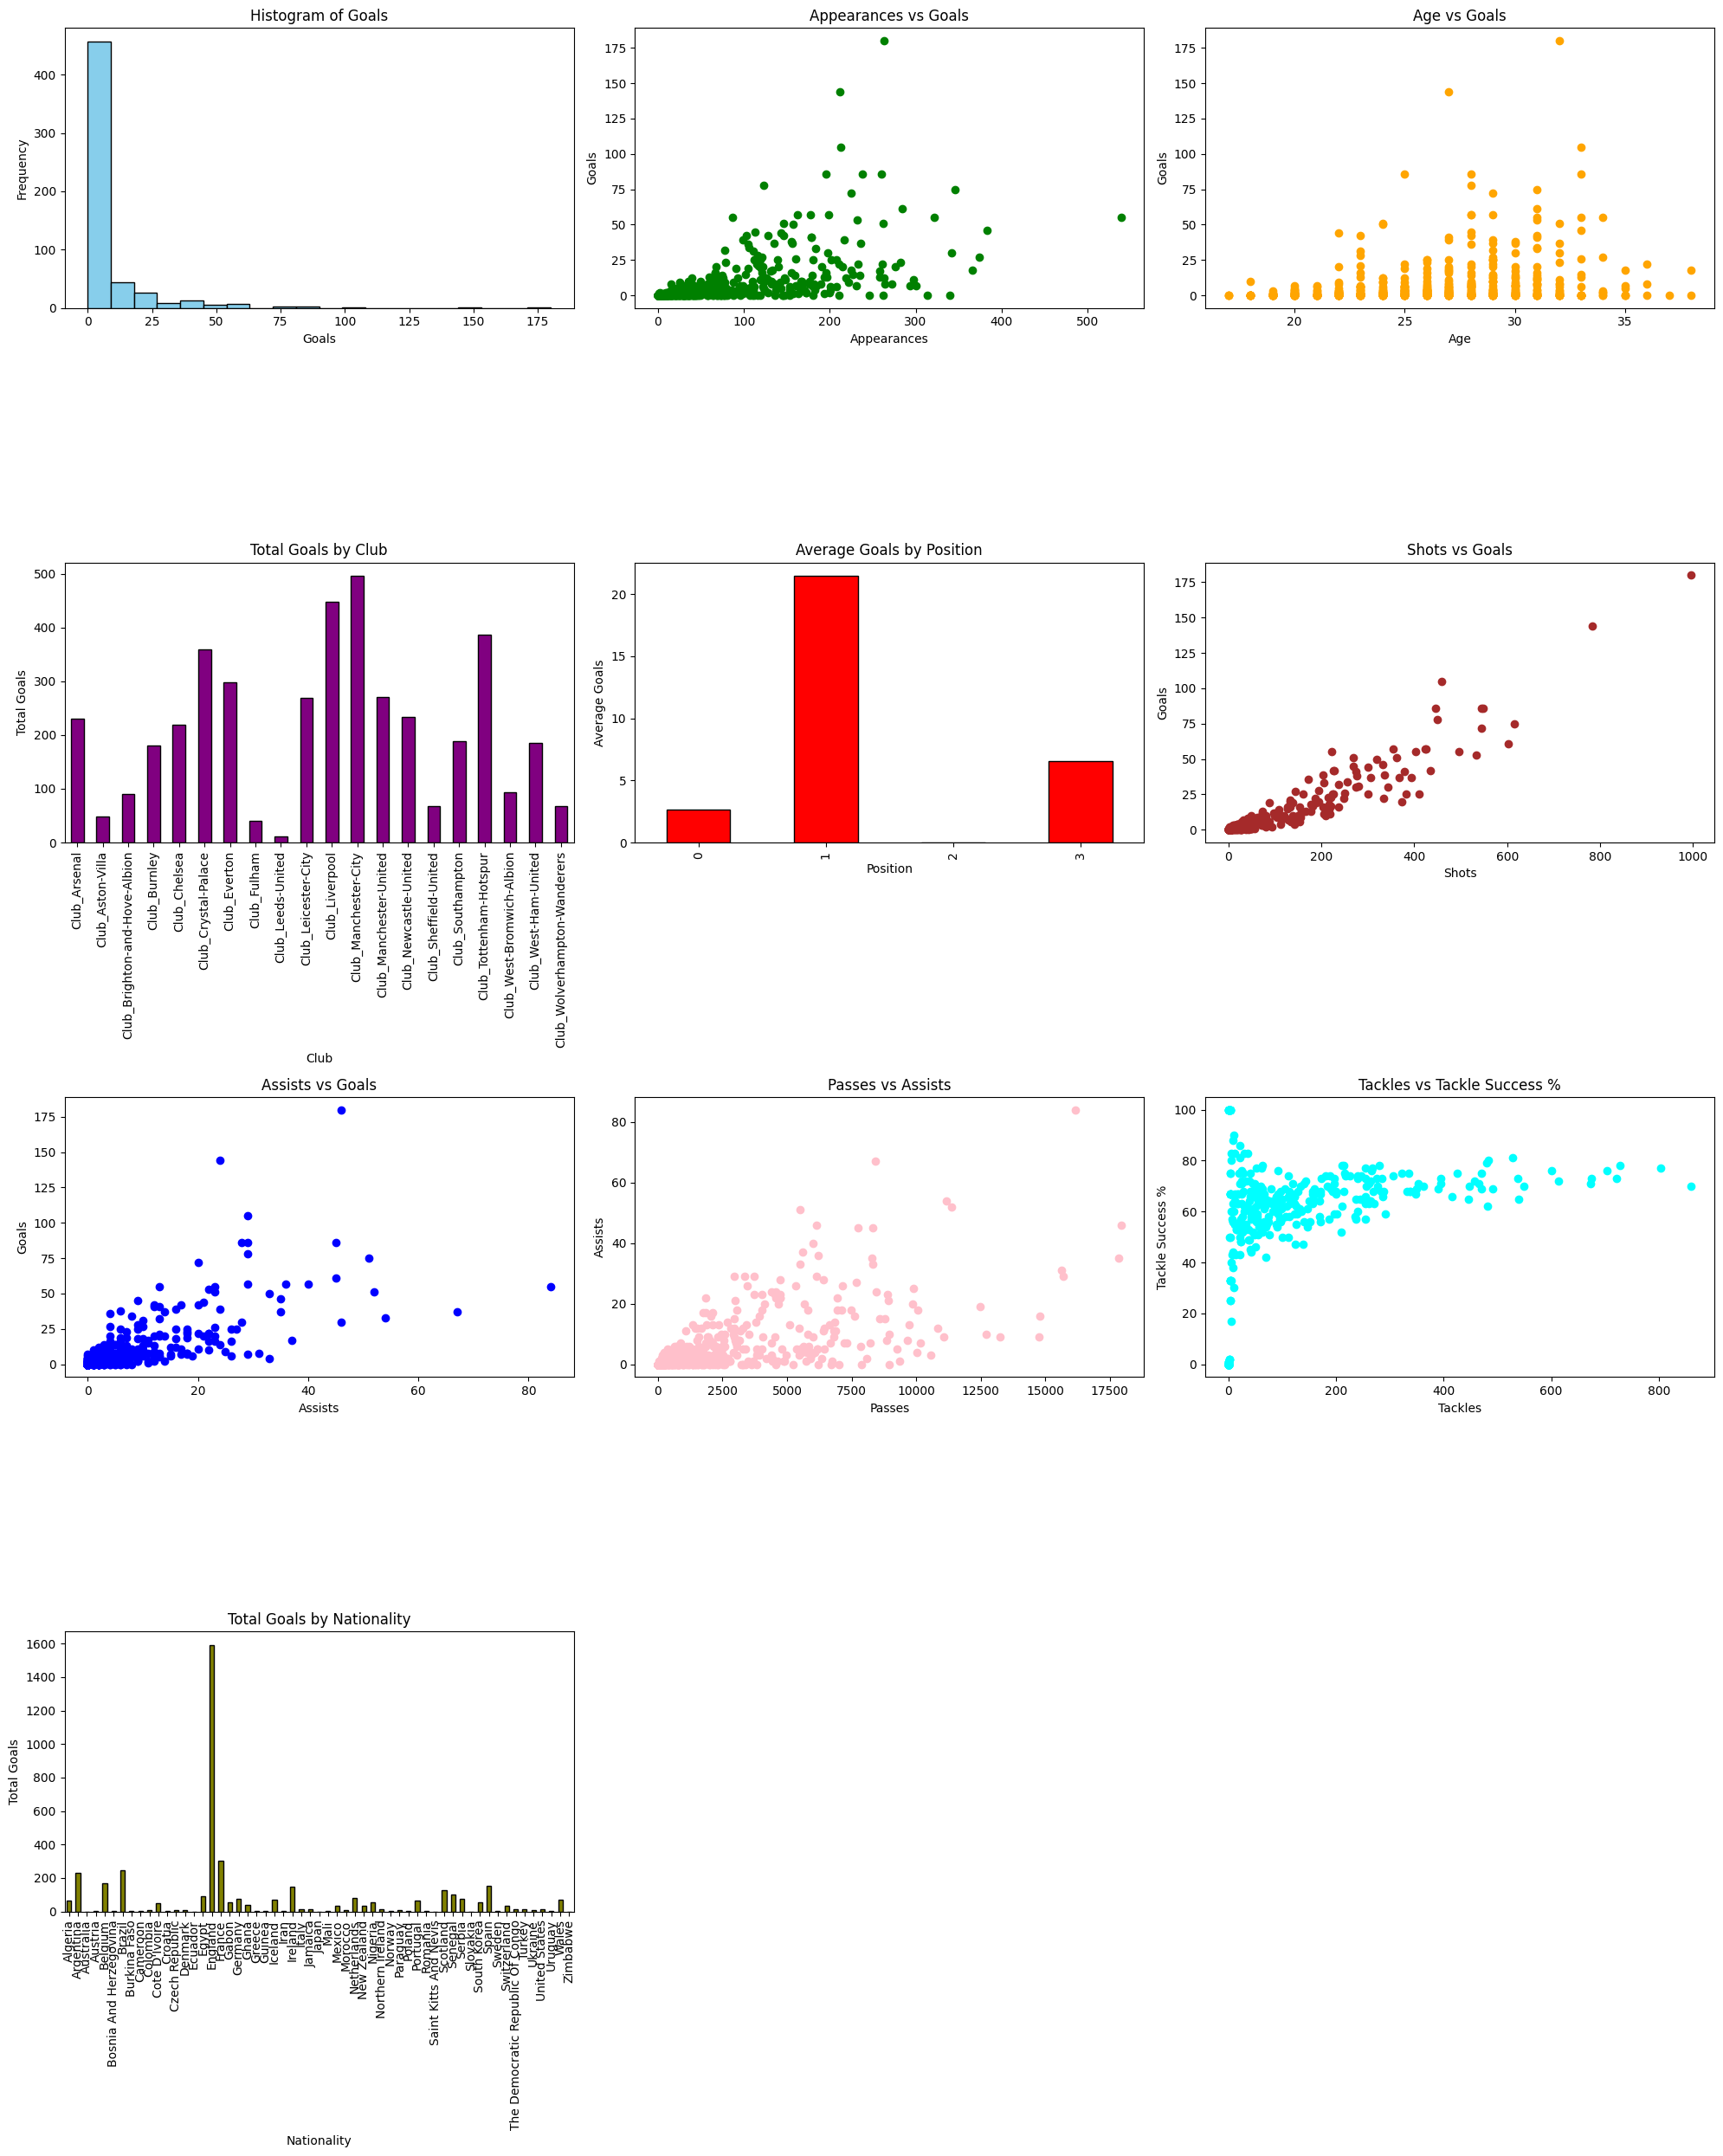

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))

plt.subplot(4, 3, 1)
plt.hist(df_sorted['Goals'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Histogram of Goals')

plt.subplot(4, 3, 2)
plt.scatter(df_sorted['Appearances'], df_sorted['Goals'], color='green')
plt.xlabel('Appearances')
plt.ylabel('Goals')
plt.title('Appearances vs Goals')

plt.subplot(4, 3, 3)
plt.scatter(df_sorted['Age'], df_sorted['Goals'], color='orange')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.title('Age vs Goals')

plt.subplot(4, 3, 4)
club_columns = [col for col in df_sorted.columns if col.startswith('Club_')]
club_goals = df_sorted[club_columns].multiply(df_sorted['Goals'], axis=0).sum()
club_goals.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel('Club')
plt.ylabel('Total Goals')
plt.title('Total Goals by Club')

plt.subplot(4, 3, 5)
position_goals = df_sorted.groupby('Position_encoded')['Goals'].mean()
position_goals.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.title('Average Goals by Position')

plt.subplot(4, 3, 6)
plt.scatter(df_sorted['Shots'], df_sorted['Goals'], color='brown')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.title('Shots vs Goals')

plt.subplot(4, 3, 7)
plt.scatter(df_sorted['Assists'], df_sorted['Goals'], color='blue')
plt.xlabel('Assists')
plt.ylabel('Goals')
plt.title('Assists vs Goals')

plt.subplot(4, 3, 8)
plt.scatter(df_sorted['Passes'], df_sorted['Assists'], color='pink')
plt.xlabel('Passes')
plt.ylabel('Assists')
plt.title('Passes vs Assists')

plt.subplot(4, 3, 9)
tackle_success = df_sorted['Tackle success %'].str.rstrip('%').astype(float)
plt.scatter(df_sorted['Tackles'], tackle_success, color='cyan')
plt.xlabel('Tackles')
plt.ylabel('Tackle Success %')
plt.title('Tackles vs Tackle Success %')

plt.subplot(4, 3, 10)
if 'Nationality' in df_sorted.columns:
    nat_goals = df_sorted.groupby('Nationality')['Goals'].sum()
    nat_goals.plot(kind='bar', color='olive', edgecolor='black')
    plt.xlabel('Nationality')
    plt.ylabel('Total Goals')
    plt.title('Total Goals by Nationality')

plt.tight_layout()
plt.show()


# 4. Homework 2
Feature Scaling
* Step1: Print raw values of Goals, Appearances and Passes (three columns in dataset)
* Step2: Apply Min-Max Scaler for Goals ,Appearances, Passes, Assists
* Step3: Apply Standardization (z-score) for Goals, shots, Passes
* Step4: Plot scatter before scaling vs after scaling

     Goals  Appearances  Passes
344    180          263    6134
489    144          212    4408
281    105          213    2961
342     86          260    8317
313     86          196    6136
140     86          238    4718
314     78          123    3357
198     75          346    5491
169     72          225    5666
185     61          284    7752


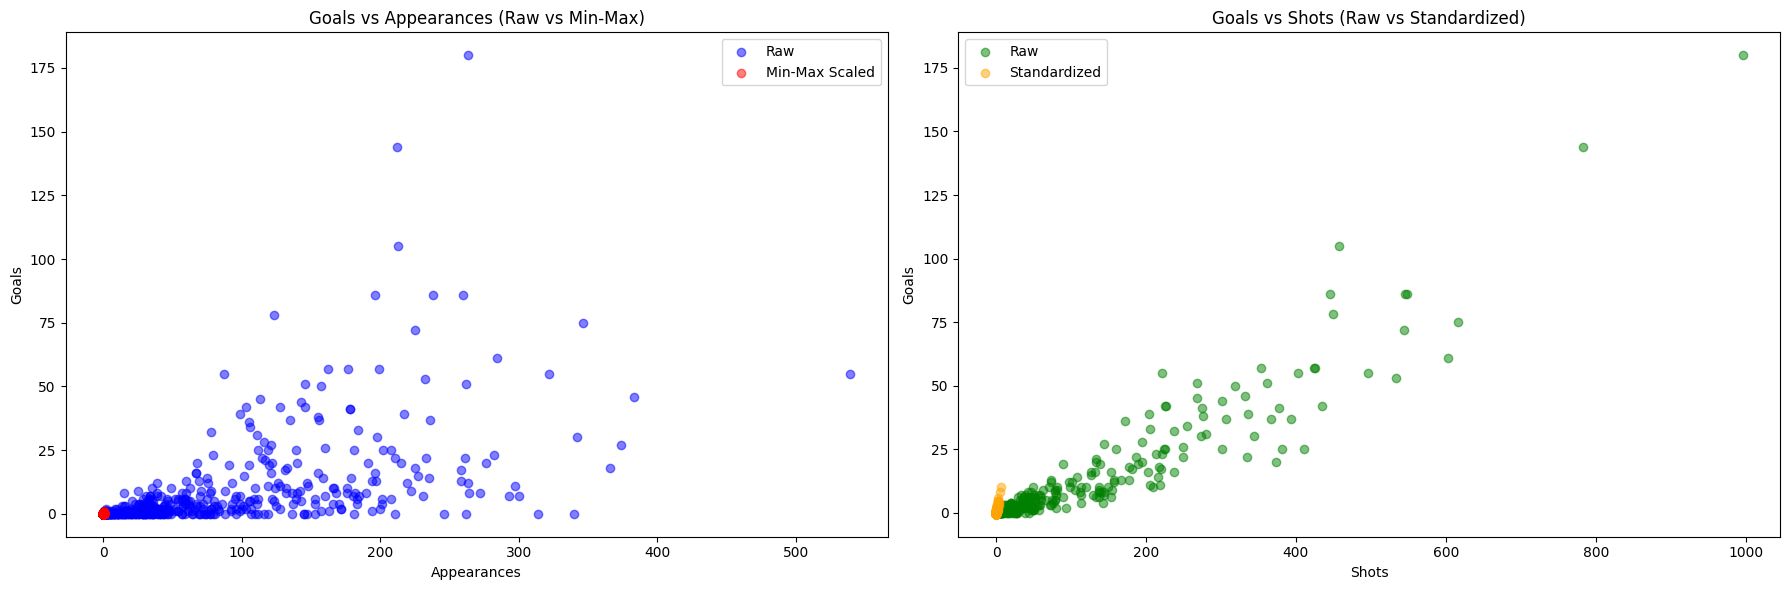

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

print(df_sorted[['Goals', 'Appearances', 'Passes']].head(10))

minmax_cols = ['Goals', 'Appearances', 'Passes', 'Assists']
minmax_scaler = MinMaxScaler()
df_scaled_minmax = df_sorted.copy()
df_scaled_minmax[minmax_cols] = minmax_scaler.fit_transform(df_scaled_minmax[minmax_cols])

std_cols = ['Goals', 'Shots', 'Passes']
std_scaler = StandardScaler()
df_scaled_std = df_sorted.copy()
df_scaled_std[std_cols] = std_scaler.fit_transform(df_scaled_std[std_cols])

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_sorted['Appearances'], df_sorted['Goals'], color='blue', alpha=0.5, label='Raw')
plt.scatter(df_scaled_minmax['Appearances'], df_scaled_minmax['Goals'], color='red', alpha=0.5, label='Min-Max Scaled')
plt.xlabel('Appearances')
plt.ylabel('Goals')
plt.title('Goals vs Appearances (Raw vs Min-Max)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df_sorted['Shots'], df_sorted['Goals'], color='green', alpha=0.5, label='Raw')
plt.scatter(df_scaled_std['Shots'], df_scaled_std['Goals'], color='orange', alpha=0.5, label='Standardized')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.title('Goals vs Shots (Raw vs Standardized)')
plt.legend()

plt.tight_layout()
plt.show()


# This week home work
1. Train and test split --divide the dataset into training and testing sets
2. Baseline Regression Model
    1. Linear Regression for player performance.
    2. Logistic Regression / Classification for match outcomes (win/draw/loss).
3. Model Evaluation:
    1. MAE, RMSE, R² for regression.
    2. Accuracy, Precision, Recall, F1 for classification.
4. Visualization
   * Task: Plot:
    1. Loss curves (train vs validation).
    2. Actual vs predicted scatter plots.
    3. Confusion matrix for match outcomes.
5. Try advanced models
    1. regression---random forest regressor
    2. classification model---XGBoost/Gradient Boosting.
6. Do hyperparameter tuning (GridSearch CV, RandomizedSearch CV)
7. Compare performance of baseline vs advanced models


Regression CV Results:
LinearRegression {'MAE': np.float64(4.13067466462566), 'RMSE': np.float64(6.518200367182095), 'R2': np.float64(0.8257923615806249)}
RandomForest {'MAE': np.float64(3.0701933827042525), 'RMSE': np.float64(6.683474440350213), 'R2': np.float64(0.8239629065888753)}
GradientBoosting {'MAE': np.float64(3.203073940791966), 'RMSE': np.float64(7.156746135478947), 'R2': np.float64(0.8008259125707579)}

Classification CV Results:
LogisticRegression {'Accuracy': np.float64(0.7960582895365503), 'Precision': np.float64(0.7960582895365503), 'Recall': np.float64(1.0), 'F1': np.float64(0.8864414910741412)}
GradientBoosting {'Accuracy': np.float64(0.7960582895365503), 'Precision': np.float64(0.7960582895365503), 'Recall': np.float64(1.0), 'F1': np.float64(0.8864414910741412)}
XGBoost {'Accuracy': np.float64(0.7960582895365503), 'Precision': np.float64(0.7960582895365503), 'Recall': np.float64(1.0), 'F1': np.float64(0.8864414910741412)}
Best Random Forest Regressor params: {'max_de

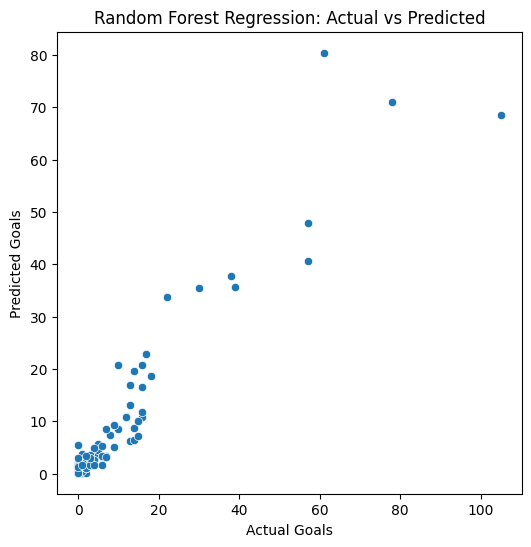

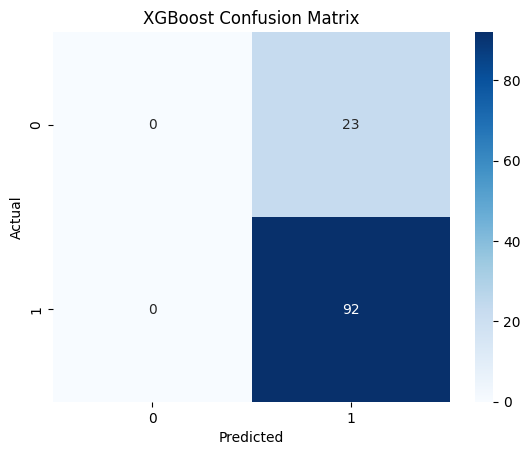

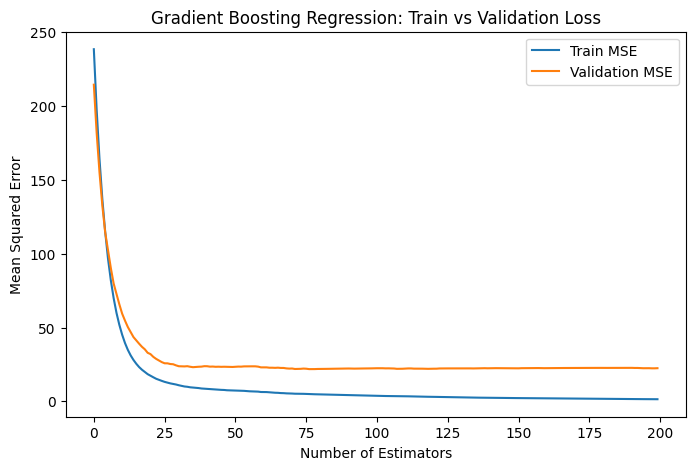

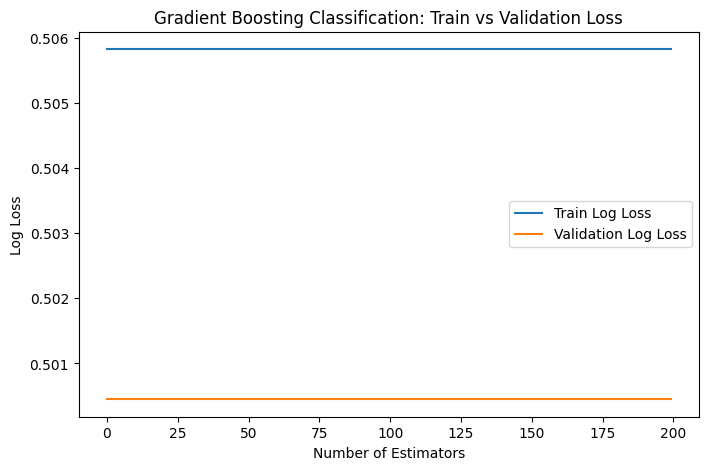

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

reg_features = ['Appearances','Shots','Passes','Assists','Age']
X_reg = df_sorted[reg_features].copy()
y_reg = df_sorted['Goals'].fillna(df_sorted['Goals'].median())

X_clf = df_sorted[['Home_Away_encoded']].copy() if 'Home_Away_encoded' in df_sorted.columns else df_sorted[['Appearances']].copy()
y_clf = df_sorted['Wins'].fillna(0).apply(lambda x: 1 if x>0 else 0)

num_imputer = SimpleImputer(strategy='median')
X_reg = pd.DataFrame(num_imputer.fit_transform(X_reg), columns=reg_features)
X_clf = pd.DataFrame(num_imputer.fit_transform(X_clf), columns=X_clf.columns)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_reg = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

models_clf = {
    "LogisticRegression": LogisticRegression(max_iter=300),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
}

# Cross-validation for regression
reg_results = {}
for name, model in models_reg.items():
    maes, rmses, r2s = [], [], []
    for train_idx, val_idx in kf.split(X_reg_train):
        X_train, X_val = X_reg_train.iloc[train_idx], X_reg_train.iloc[val_idx]
        y_train, y_val = y_reg_train.iloc[train_idx], y_reg_train.iloc[val_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        maes.append(mean_absolute_error(y_val, y_pred))
        rmses.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        r2s.append(r2_score(y_val, y_pred))
    reg_results[name] = {'MAE': np.mean(maes), 'RMSE': np.mean(rmses), 'R2': np.mean(r2s)}

# Cross-validation for classification
clf_results = {}
for name, model in models_clf.items():
    accs, precs, recs, f1s = [], [], [], []
    for train_idx, val_idx in skf.split(X_clf_train, y_clf_train):
        X_train, X_val = X_clf_train.iloc[train_idx], X_clf_train.iloc[val_idx]
        y_train, y_val = y_clf_train.iloc[train_idx], y_clf_train.iloc[val_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        accs.append(accuracy_score(y_val, y_pred))
        precs.append(precision_score(y_val, y_pred))
        recs.append(recall_score(y_val, y_pred))
        f1s.append(f1_score(y_val, y_pred))
    clf_results[name] = {'Accuracy': np.mean(accs), 'Precision': np.mean(precs),
                         'Recall': np.mean(recs), 'F1': np.mean(f1s)}

print("Regression CV Results:")
for m, metrics in reg_results.items():
    print(m, metrics)

print("\nClassification CV Results:")
for m, metrics in clf_results.items():
    print(m, metrics)

# Hyperparameter tuning
reg_param_grid = {'n_estimators':[100,200], 'max_depth':[None,5,8], 'min_samples_split':[2,5]}
clf_param_grid = {'n_estimators':[100,200], 'learning_rate':[0.05,0.1], 'max_depth':[3,4,5]}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), reg_param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_rf.fit(X_reg_train, y_reg_train)
print("Best Random Forest Regressor params:", grid_rf.best_params_)

rand_xgb = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), clf_param_grid, n_iter=4, cv=skf, random_state=42, scoring='accuracy')
rand_xgb.fit(X_clf_train, y_clf_train)
print("Best XGBoost Classifier params:", rand_xgb.best_params_)

# Regression: scatter plot actual vs predicted
best_reg = grid_rf.best_estimator_
best_reg.fit(X_reg_train, y_reg_train)
y_pred_reg = best_reg.predict(X_reg_test)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_reg_test, y=y_pred_reg)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

# Classification: confusion matrix
best_clf = rand_xgb.best_estimator_
best_clf.fit(X_clf_train, y_clf_train)
y_pred_clf = best_clf.predict(X_clf_test)
cm = confusion_matrix(y_clf_test, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Gradient Boosting Regression: train vs validation loss curve
gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_reg.fit(X_reg_train, y_reg_train)
train_loss = [mean_squared_error(y_reg_train, y_pred) for y_pred in gb_reg.staged_predict(X_reg_train)]
val_loss = [mean_squared_error(y_reg_test, y_pred) for y_pred in gb_reg.staged_predict(X_reg_test)]
plt.figure(figsize=(8,5))
plt.plot(np.arange(gb_reg.n_estimators_), train_loss, label='Train MSE')
plt.plot(np.arange(gb_reg.n_estimators_), val_loss, label='Validation MSE')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Regression: Train vs Validation Loss")
plt.legend()
plt.show()

# Gradient Boosting Classification: train vs validation log loss
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb_clf.fit(X_clf_train, y_clf_train)
train_loss_clf = [-np.mean(y_clf_train*np.log(p[:,1]) + (1-y_clf_train)*np.log(1-p[:,1]))
                  for p in gb_clf.staged_predict_proba(X_clf_train)]
val_loss_clf = [-np.mean(y_clf_test*np.log(p[:,1]) + (1-y_clf_test)*np.log(1-p[:,1]))
                for p in gb_clf.staged_predict_proba(X_clf_test)]
plt.figure(figsize=(8,5))
plt.plot(np.arange(gb_clf.n_estimators_), train_loss_clf, label='Train Log Loss')
plt.plot(np.arange(gb_clf.n_estimators_), val_loss_clf, label='Validation Log Loss')
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title("Gradient Boosting Classification: Train vs Validation Loss")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Regression metrics
regression_models = {'RandomForest': best_reg, 'GradientBoosting': models_reg['GradientBoosting']}
for name, model in regression_models.items():
    if name == 'GradientBoosting':
        model.fit(X_reg_train, y_reg_train)
        y_pred = model.predict(X_reg_test)
    else:
        y_pred = model.predict(X_reg_test)
    mae = mean_absolute_error(y_reg_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred))
    r2 = r2_score(y_reg_test, y_pred)
    print(f"{name} Regression Metrics:")
    print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}\n")

# Classification metrics
classification_models = {'XGBoost': best_clf, 'GradientBoosting': models_clf['GradientBoosting']}
for name, model in classification_models.items():
    if name == 'GradientBoosting':
        model.fit(X_clf_train, y_clf_train)
        y_pred = model.predict(X_clf_test)
    else:
        y_pred = model.predict(X_clf_test)
    acc = accuracy_score(y_clf_test, y_pred)
    prec = precision_score(y_clf_test, y_pred)
    rec = recall_score(y_clf_test, y_pred)
    f1 = f1_score(y_clf_test, y_pred)
    cm = confusion_matrix(y_clf_test, y_pred)
    print(f"{name} Classification Metrics:")
    print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")
    print(f"Confusion Matrix:\n{cm}\n")


RandomForest Regression Metrics:
MAE: 2.342, RMSE: 5.069, R2: 0.899

GradientBoosting Regression Metrics:
MAE: 2.318, RMSE: 4.738, R2: 0.912

XGBoost Classification Metrics:
Accuracy: 0.800, Precision: 0.800, Recall: 1.000, F1: 0.889
Confusion Matrix:
[[ 0 23]
 [ 0 92]]

GradientBoosting Classification Metrics:
Accuracy: 0.800, Precision: 0.800, Recall: 1.000, F1: 0.889
Confusion Matrix:
[[ 0 23]
 [ 0 92]]



Note for Self:
This model can be further improved and optimized.
The Recall rate suggests that there is class imbalance in the dataset, which can be optimized by adding weighted classes. I will implement the changes in the next code update.